## Grouping Water Treatment Plants

This ML Experiment is to cluster water treatment plants based on their properties.
The features in the data is as follows:

```   
 1  Q-E        (input flow to plant)  
 2  ZN-E       (input Zinc to plant)
 3  PH-E       (input pH to plant) 
 4  DBO-E      (input Biological demand of oxygen to plant) 
 5  DQO-E      (input chemical demand of oxygen to plant)
 6  SS-E       (input suspended solids to plant)  
 7  SSV-E      (input volatile supended solids to plant)
 8  SED-E      (input sediments to plant) 
 9  COND-E     (input conductivity to plant) 
10  PH-P       (input pH to primary settler)
11  DBO-P      (input Biological demand of oxygen to primary settler)
12  SS-P       (input suspended solids to primary settler)
13  SSV-P      (input volatile supended solids to primary settler)
14  SED-P      (input sediments to primary settler) 
15  COND-P     (input conductivity to primary settler)
16  PH-D       (input pH to secondary settler) 
17  DBO-D      (input Biological demand of oxygen to secondary settler)
18  DQO-D      (input chemical demand of oxygen to secondary settler)
19  SS-D       (input suspended solids to secondary settler)
20  SSV-D      (input volatile supended solids to secondary settler)
21  SED-D      (input sediments to secondary settler)  
22  COND-D     (input conductivity to secondary settler) 
23  PH-S       (output pH)   
24  DBO-S      (output Biological demand of oxygen)
25  DQO-S      (output chemical demand of oxygen)
26  SS-S       (output suspended solids)
27  SSV-S      (output volatile supended solids) 
28  SED-S      (output sediments) 
29  COND-S     (output conductivity)
30  RD-DBO-P   (performance input Biological demand of oxygen in primary settler)
31  RD-SS-P    (performance input suspended solids to primary settler)
32  RD-SED-P   (performance input sediments to primary settler)
33  RD-DBO-S   (performance input Biological demand of oxygen to secondary settler)
34  RD-DQO-S   (performance input chemical demand of oxygen to secondary settler)
35  RD-DBO-G   (global performance input Biological demand of oxygen)
36  RD-DQO-G   (global performance input chemical demand of oxygen)
37  RD-SS-G    (global performance input suspended solids) 
38  RD-SED-G   (global performance input sediments)
```

### 1. Data Loading & Understanding

In this section we will load the available data, and understand its patterns.

In [130]:
# Import libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [131]:
# setting some general properties
# for all visualizations
plt.rcParams['figure.figsize'] = (5,5)
plt.style.use('ggplot')

In [132]:
# disable warnings.
warnings.filterwarnings('ignore')

In [133]:
# load the data as a Dataframe
df_wtp_raw = pd.read_csv('../data/water_treatment_plant/water-treatment.data')
columns = [
    'date',
    'Q_E','ZN_E','PH_E','DBO_E','DQO_E','SS_E','SSV_E','SED_E','COND_E','PH_P','DBO_P','SS_P','SSV_P',
    'SED_P','COND_P','PH_D','DBO_D','DQO_D','SS_D','SSV_D','SED_D','COND_D','PH_S','DBO_S','DQO_S',
    'SS_S','SSV_S','SED_S','COND_S','RD_DBO_P','RD_SS_P','RD_SED_P','RD_DBO_S','RD_DQO_S','RD_DBO_G',
    'RD_DQO_G','RD_SS_G','RD_SED_G'
]
df_wtp_raw.columns = columns
df_wtp_raw.head()

,date,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
0,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
1,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
2,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
3,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
4,D-7/3/90,38572,3.00,7.8,202,372,186,68.8,4.5,1644,...,1764,?,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100


In [134]:
# check dataset information
df_wtp_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      526 non-null    object 
 1   Q_E       526 non-null    object 
 2   ZN_E      526 non-null    object 
 3   PH_E      526 non-null    float64
 4   DBO_E     526 non-null    object 
 5   DQO_E     526 non-null    object 
 6   SS_E      526 non-null    object 
 7   SSV_E     526 non-null    object 
 8   SED_E     526 non-null    object 
 9   COND_E    526 non-null    int64  
 10  PH_P      526 non-null    float64
 11  DBO_P     526 non-null    object 
 12  SS_P      526 non-null    int64  
 13  SSV_P     526 non-null    object 
 14  SED_P     526 non-null    object 
 15  COND_P    526 non-null    int64  
 16  PH_D      526 non-null    float64
 17  DBO_D     526 non-null    object 
 18  DQO_D     526 non-null    object 
 19  SS_D      526 non-null    object 
 20  SSV_D     526 non-null    object

**Quick observations**

1. We have many columns with wrong data type (data being a real number, type being string!)
2. In many cases we also have missing values denoted as '?'. these can be replaced with Median.

In [135]:
# creating reusable function to impute
# incorrect '?' values with median
def impute_with_median(df):
    """
    Imputes missing values ('?') in a DataFrame with medians for numeric columns.

    Args:
        df: A pandas DataFrame.

    Returns:
        A new pandas DataFrame with missing values replaced by medians.
    """

    # Create a copy to avoid modifying the original DataFrame
    df_impute = df.copy()

    # Loop through each column in the copy dataframe
    for col in df_impute.columns:
        filtered_data = df_impute[col][df_impute[col] != '?']
        df_filtered_data = pd.DataFrame(filtered_data)
        median_value = int(df_filtered_data.median().iloc[0])
        print(f"Median value of column '{col}' = '{median_value}'")
        df_impute.loc[df_impute[col] == '?', col] = median_value

    return df_impute

In [136]:
# Calling the utility function to clean data

# creating a copy of the dataframe
df_wtp_copy = df_wtp_raw.copy()

# removing the date col
df_wtp_copy.drop('date', axis=1, inplace=True)

# call utility for cleaning
df_wtp_clean = impute_with_median(df_wtp_copy)

# check dataframe
df_wtp_clean.head()

Median value of column 'Q_E' = '35933'
Median value of column 'ZN_E' = '1'
Median value of column 'PH_E' = '7'
Median value of column 'DBO_E' = '182'
Median value of column 'DQO_E' = '399'
Median value of column 'SS_E' = '196'
Median value of column 'SSV_E' = '64'
Median value of column 'SED_E' = '4'
Median value of column 'COND_E' = '1405'
Median value of column 'PH_P' = '7'
Median value of column 'DBO_P' = '197'
Median value of column 'SS_P' = '220'
Median value of column 'SSV_P' = '62'
Median value of column 'SED_P' = '4'
Median value of column 'COND_P' = '1419'
Median value of column 'PH_D' = '7'
Median value of column 'DBO_D' = '119'
Median value of column 'DQO_D' = '274'
Median value of column 'SS_D' = '90'
Median value of column 'SSV_D' = '74'
Median value of column 'SED_D' = '0'
Median value of column 'COND_D' = '1427'
Median value of column 'PH_S' = '7'
Median value of column 'DBO_S' = '18'
Median value of column 'DQO_S' = '83'
Median value of column 'SS_S' = '19'
Median value

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
0,39024,3.00,7.7,182,443,214,69.2,6.5,2660,7.7,...,2590,39,60.7,94.8,85,80.8,90,79.5,92.1,100
1,32229,5.00,7.6,182,528,186,69.9,3.4,1666,7.7,...,1888,39,58.2,95.6,85,52.9,90,75.8,88.7,98.5
2,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
3,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,39,62.7,95.6,85,71.0,92.1,78.2,87.5,99.5
4,38572,3.00,7.8,202,372,186,68.8,4.5,1644,7.8,...,1764,39,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100


In [137]:
# join the date column back into clean dataframe
df_wtp_date = pd.DataFrame(df_wtp_raw['date'])
all_columns = df_wtp_raw.columns
df_wtp_clean_all_cols = pd.concat([df_wtp_date, df_wtp_clean], axis=1, ignore_index=True)
df_wtp_clean_all_cols.columns = all_columns
df_wtp_clean_all_cols.head()

,date,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
0,D-2/3/90,39024,3.00,7.7,182,443,214,69.2,6.5,2660,...,2590,39,60.7,94.8,85,80.8,90,79.5,92.1,100
1,D-4/3/90,32229,5.00,7.6,182,528,186,69.9,3.4,1666,...,1888,39,58.2,95.6,85,52.9,90,75.8,88.7,98.5
2,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
3,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,39,62.7,95.6,85,71.0,92.1,78.2,87.5,99.5
4,D-7/3/90,38572,3.00,7.8,202,372,186,68.8,4.5,1644,...,1764,39,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100


In [138]:
# checking dataset information again
df_wtp_clean_all_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      526 non-null    object 
 1   Q_E       526 non-null    object 
 2   ZN_E      526 non-null    object 
 3   PH_E      526 non-null    float64
 4   DBO_E     526 non-null    object 
 5   DQO_E     526 non-null    object 
 6   SS_E      526 non-null    object 
 7   SSV_E     526 non-null    object 
 8   SED_E     526 non-null    object 
 9   COND_E    526 non-null    int64  
 10  PH_P      526 non-null    float64
 11  DBO_P     526 non-null    object 
 12  SS_P      526 non-null    int64  
 13  SSV_P     526 non-null    object 
 14  SED_P     526 non-null    object 
 15  COND_P    526 non-null    int64  
 16  PH_D      526 non-null    float64
 17  DBO_D     526 non-null    object 
 18  DQO_D     526 non-null    object 
 19  SS_D      526 non-null    object 
 20  SSV_D     526 non-null    object

**Observation**

1. The date column contains values with prefix as D-. This can be cleaned or we can ignore this feature while clustering.

### 2. Data Analysis

In this section, we will explore the data and find valuable information about its properties.
This will help us perform any data preparations if required.

In [139]:
# create reusable function to perform univariate
# analysis of each col other than the 'date' column
def univar_analysis(df: pd.DataFrame):
    """ Takes WTP Dataset as input and prints distplots for each col. """
    for each_col in df_wtp_clean_all_cols.columns:
        # visualize if col. is not date
        if each_col != "date":
            # create dist. plot
            print(f"Dist. Plot for : {each_col}")
            print("================================")
            plt.hist(df_wtp_clean_all_cols[each_col].astype('str'));
            plt.show();
            print("================================")

Dist. Plot for : Q_E


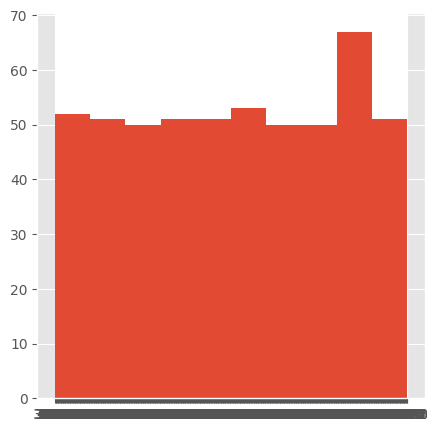

Dist. Plot for : ZN_E


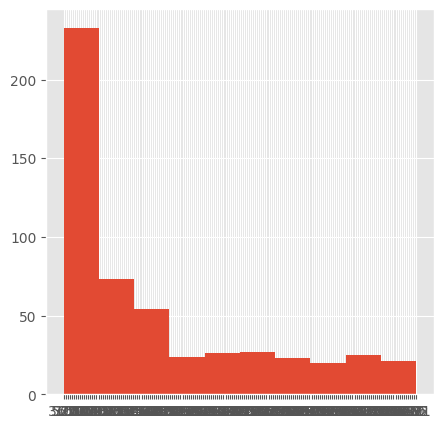

Dist. Plot for : PH_E


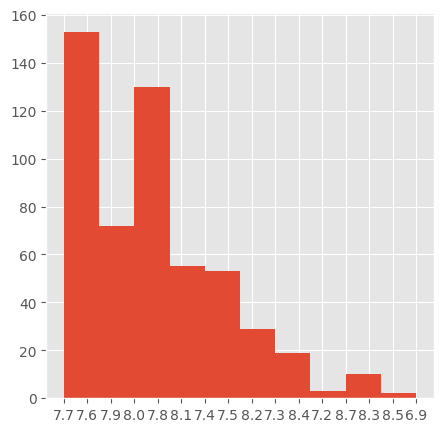

Dist. Plot for : DBO_E


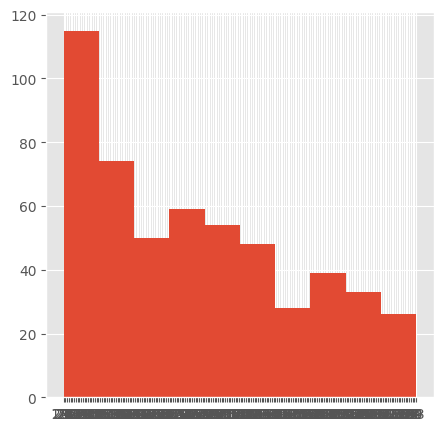

Dist. Plot for : DQO_E


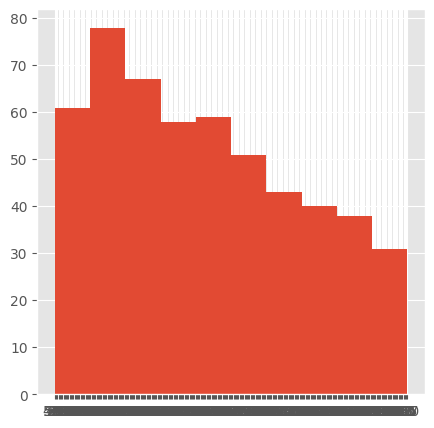

Dist. Plot for : SS_E


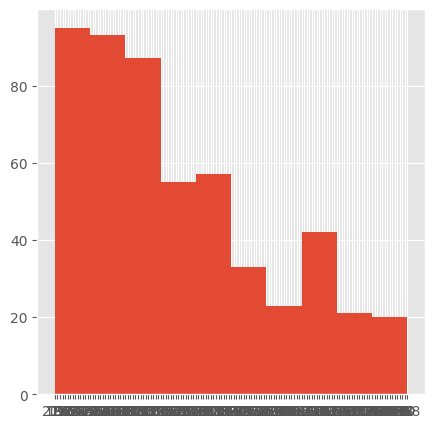

Dist. Plot for : SSV_E


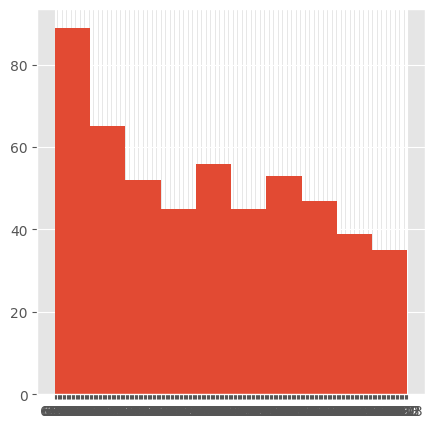

Dist. Plot for : SED_E


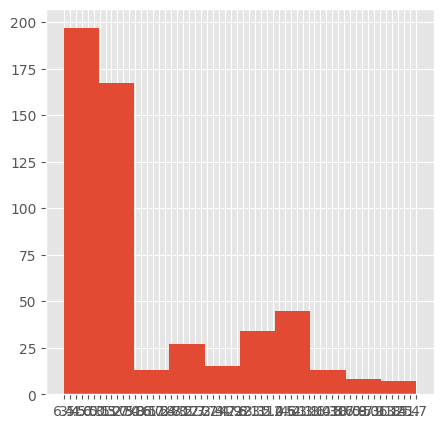

Dist. Plot for : COND_E


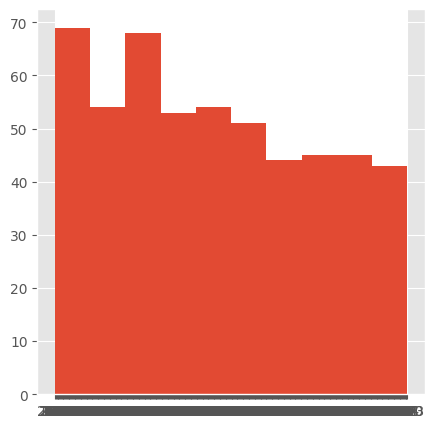

Dist. Plot for : PH_P


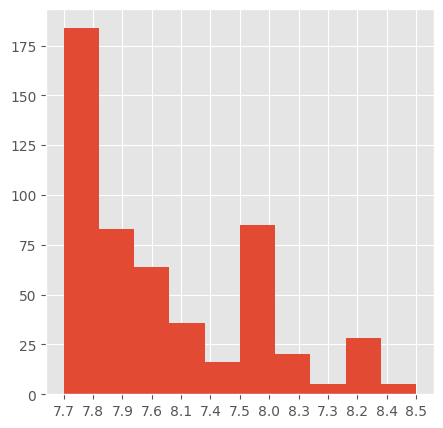

Dist. Plot for : DBO_P


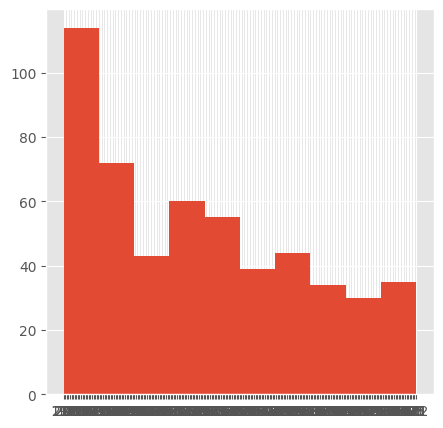

Dist. Plot for : SS_P


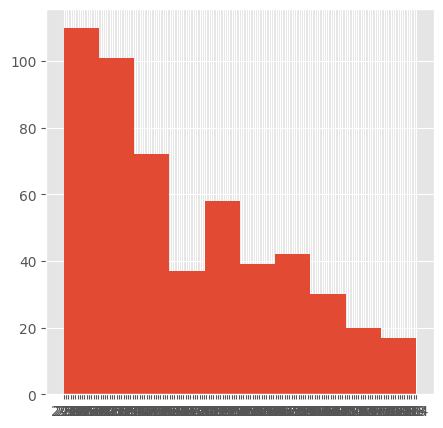

Dist. Plot for : SSV_P


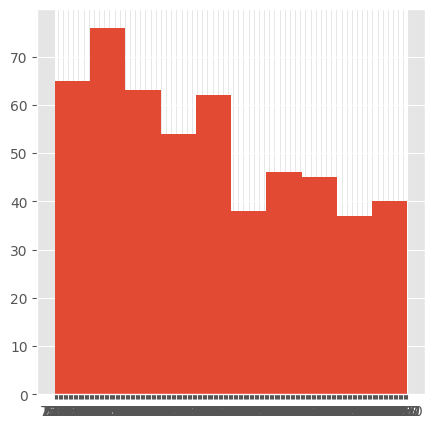

Dist. Plot for : SED_P


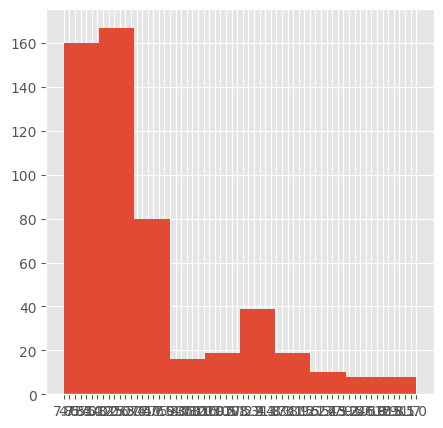

Dist. Plot for : COND_P


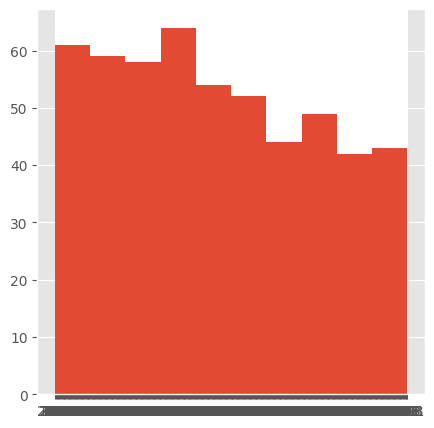

Dist. Plot for : PH_D


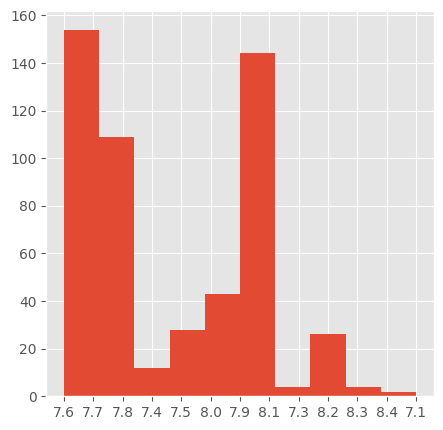

Dist. Plot for : DBO_D


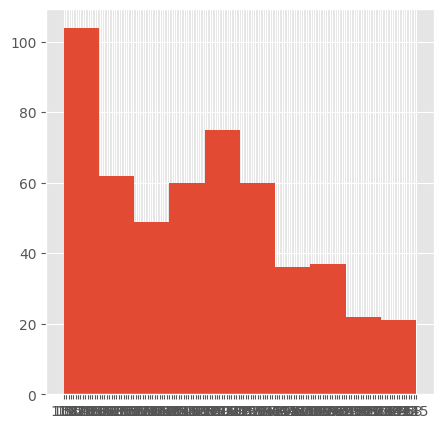

Dist. Plot for : DQO_D


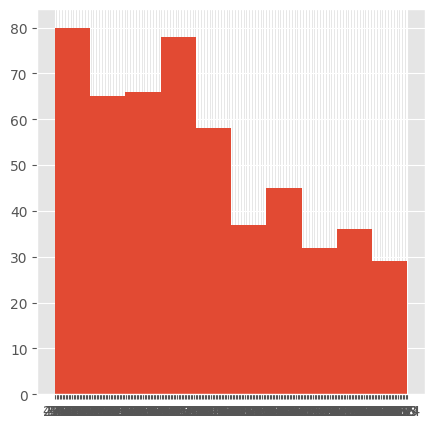

Dist. Plot for : SS_D


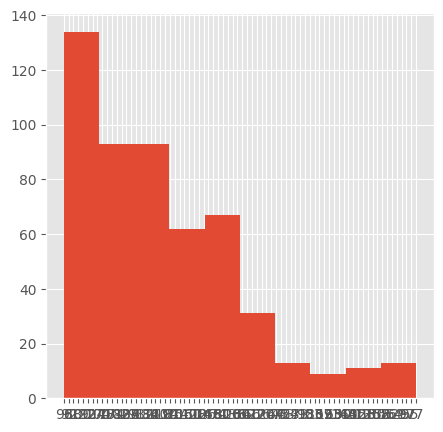

Dist. Plot for : SSV_D


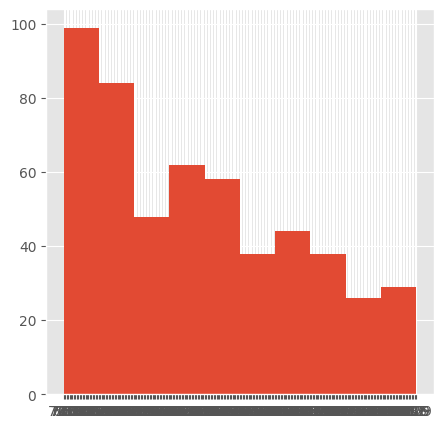

Dist. Plot for : SED_D


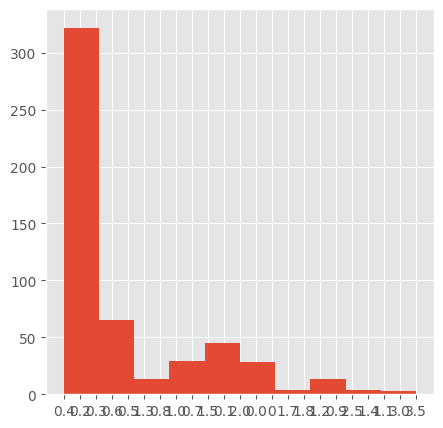

Dist. Plot for : COND_D


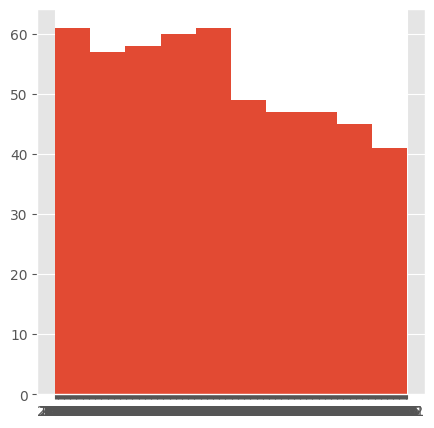

Dist. Plot for : PH_S


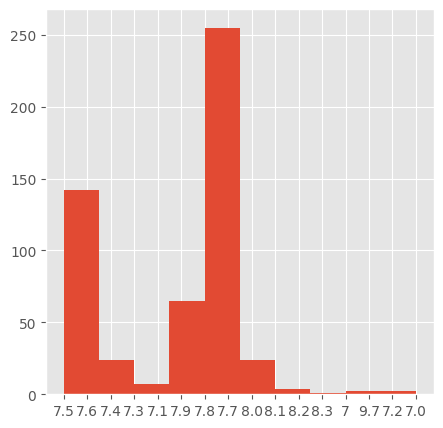

Dist. Plot for : DBO_S


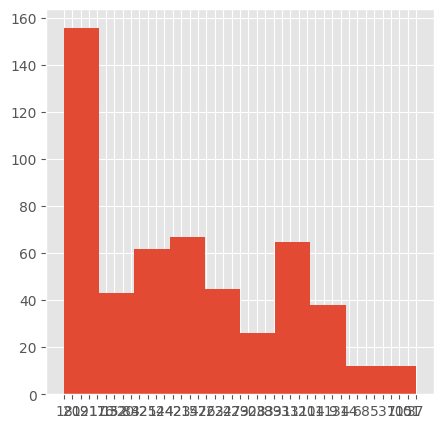

Dist. Plot for : DQO_S


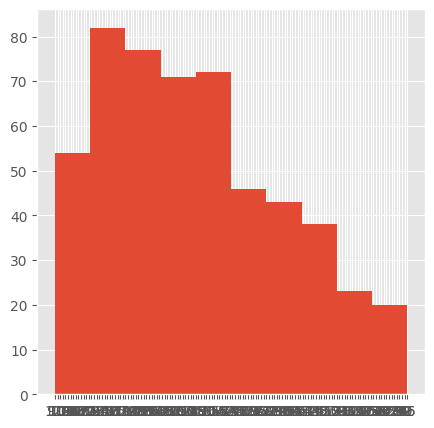

Dist. Plot for : SS_S


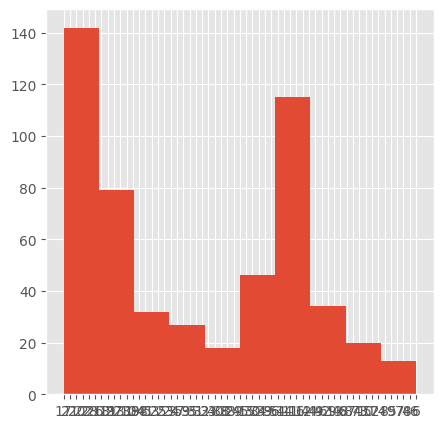

Dist. Plot for : SSV_S


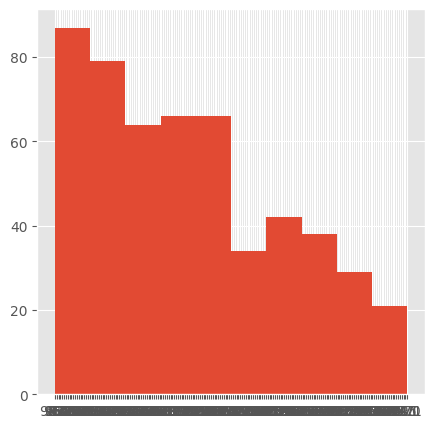

Dist. Plot for : SED_S


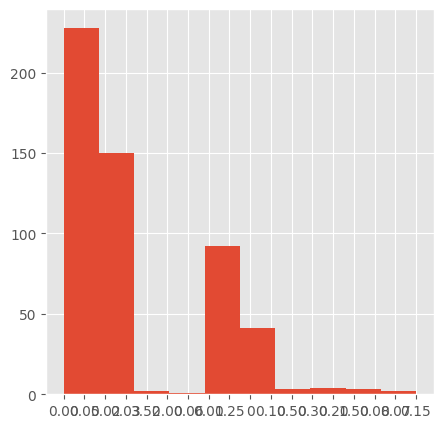

Dist. Plot for : COND_S


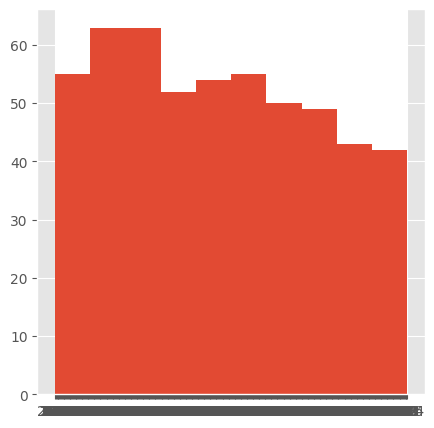

Dist. Plot for : RD_DBO_P


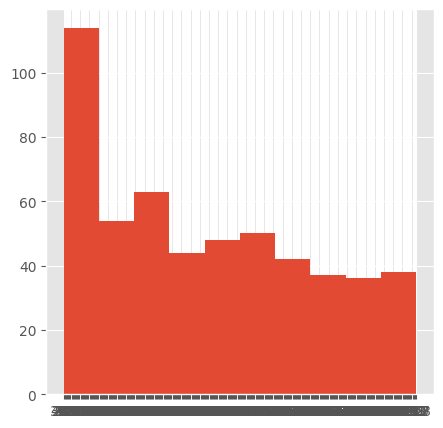

Dist. Plot for : RD_SS_P


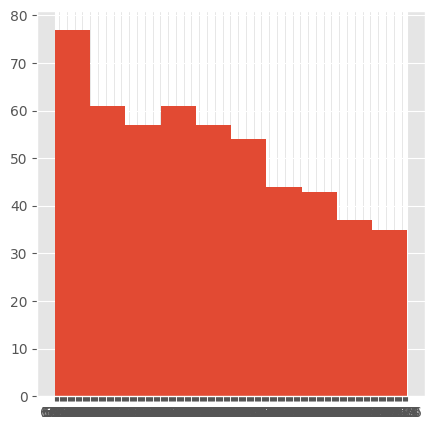

Dist. Plot for : RD_SED_P


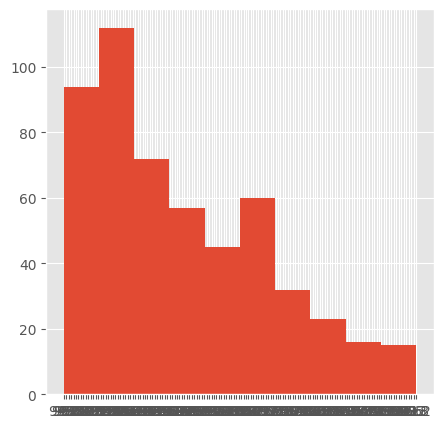

Dist. Plot for : RD_DBO_S


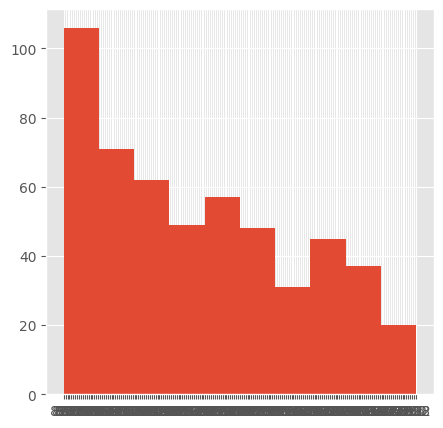

Dist. Plot for : RD_DQO_S


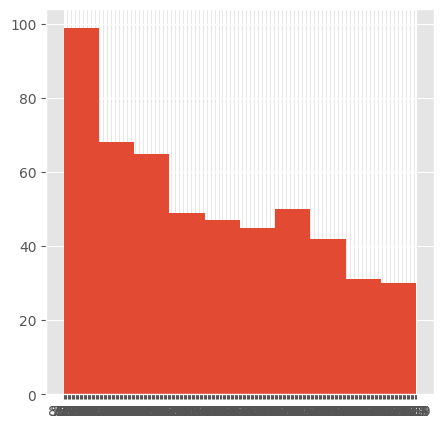

Dist. Plot for : RD_DBO_G


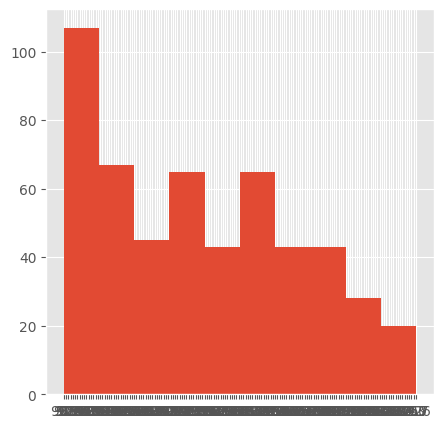

Dist. Plot for : RD_DQO_G


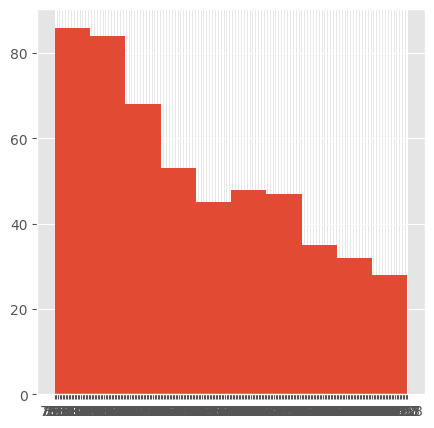

Dist. Plot for : RD_SS_G


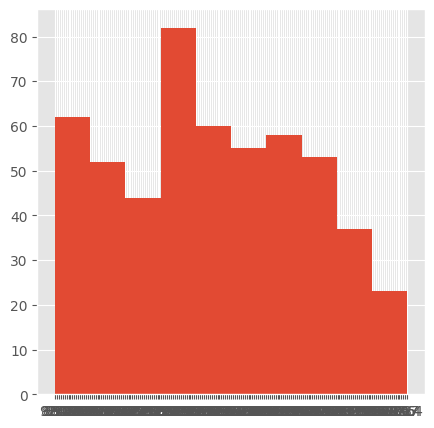

Dist. Plot for : RD_SED_G


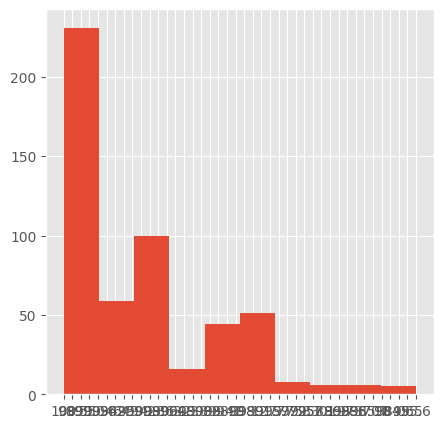

In [140]:
# Call utility function for dist. plotting
univar_analysis(df_wtp_clean)

**Observations**

1. None of the features are normally distributed. This is a typical representation of real-world data.
2. For many, the values in these features are too granular, hence the X Axis of these charts are unclear.
3. Many of these values have different ranges. We can check the dataset description to get more details.

In [141]:
# Checking dataset description
df_wtp_clean_all_cols.describe()

,PH_E,COND_E,PH_P,SS_P,COND_P,PH_D,COND_D
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,7.810076,1477.420152,7.829848,254.001901,1494.847909,7.811787,1489.581749
std,0.246409,394.310441,0.227120,147.594483,402.048938,0.199747,399.728036
min,6.900000,651.000000,7.300000,104.000000,646.000000,7.100000,85.000000
25%,7.600000,1200.500000,7.700000,184.000000,1217.000000,7.700000,1223.750000
50%,7.800000,1405.500000,7.800000,220.000000,1419.000000,7.800000,1427.500000
75%,8.000000,1672.000000,8.000000,272.000000,1708.750000,7.900000,1696.500000
max,8.700000,3230.000000,8.500000,1692.000000,3170.000000,8.400000,3690.000000


**Data Type Conversion**: Without ensuring that all columns are converted to float64, we cannot describe their statistics propertly. Using "include='all'" in describe() function does not resolve the quality issues inherently.

In [142]:
# Reusable function to convert datatypes
# to float64 datatype
def convert_to_float64(df):
    """
    Converts the data types of all columns in a pandas DataFrame to Float64,
    handling potential errors during conversion.
    """
    # make a copy of the dataframe
    df_copy = df.copy()

    # Iterate over columns and convert 
    # dtypes to float64 (with error handling)
    for col in df_copy.columns:
        try:
            df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')  # Handle potential errors
        except:
            pass  # Ignore

    # return converted dataframe
    return df_copy

In [143]:
# Convert values using the dataset
# without the 'date' column
df_wtp_convert = convert_to_float64(df_wtp_clean)
df_wtp_convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q_E       526 non-null    int64  
 1   ZN_E      526 non-null    float64
 2   PH_E      526 non-null    float64
 3   DBO_E     526 non-null    int64  
 4   DQO_E     526 non-null    int64  
 5   SS_E      526 non-null    int64  
 6   SSV_E     526 non-null    float64
 7   SED_E     526 non-null    float64
 8   COND_E    526 non-null    int64  
 9   PH_P      526 non-null    float64
 10  DBO_P     526 non-null    int64  
 11  SS_P      526 non-null    int64  
 12  SSV_P     526 non-null    float64
 13  SED_P     526 non-null    float64
 14  COND_P    526 non-null    int64  
 15  PH_D      526 non-null    float64
 16  DBO_D     526 non-null    int64  
 17  DQO_D     526 non-null    int64  
 18  SS_D      526 non-null    int64  
 19  SSV_D     526 non-null    float64
 20  SED_D     526 non-null    float6

In [144]:
# Now, describe the dataset
df_wtp_convert.describe()

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,37169.231939,2.352947,7.810076,188.433460,406.807985,227.501901,61.438403,4.565779,1477.420152,7.829848,...,1493.735741,39.075856,58.521863,90.670342,83.563118,67.871673,89.079278,77.907985,88.982319,99.080228
std,6524.922388,2.745927,0.246409,60.763447,119.791387,135.921052,12.300295,2.683475,394.310441,0.227120,...,387.287569,13.907073,12.765978,8.734655,8.480704,11.340153,6.793813,8.686551,8.167276,4.327932
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,...,683.000000,0.600000,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000
25%,32959.000000,0.900000,7.600000,148.000000,326.250000,170.000000,55.825000,3.200000,1200.500000,7.700000,...,1234.500000,31.125000,50.600000,88.900000,81.800000,63.400000,87.800000,74.225000,87.700000,99.200000
50%,35933.000000,1.500000,7.800000,182.000000,399.000000,196.000000,64.000000,4.100000,1405.500000,7.800000,...,1431.000000,39.000000,59.300000,93.300000,85.000000,69.250000,90.000000,79.000000,90.700000,99.700000
75%,41050.500000,3.000000,8.000000,222.000000,475.250000,242.000000,69.600000,5.500000,1672.000000,8.000000,...,1690.000000,47.675000,66.850000,95.700000,87.700000,75.000000,92.300000,83.200000,93.000000,100.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,8.500000,...,3950.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


**Observations**

1. We will run the initial Clustering models using the data as-is, although normalisation may speed up the clustering process.
2. Once the initial model is built and it is evaluated, we can come back to process the data more, and test if that improves the performance

### 3. Initial Modelling

In this part, we will create the first Clustering model using various algorithms and check how good the clusters are, at least visually and with some metrics.

Later, we will improve these models and find better ways to "fit" them.

In [145]:
# creating a KMeans cluster object
# taking a random value of K=5
kmeans = KMeans(n_clusters=5)

In [146]:
# checking if we selected the right data
df_wtp_convert.head()

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,COND_S,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G
0,39024,3.0,7.7,182,443,214,69.2,6.5,2660,7.7,...,2590,39.0,60.7,94.8,85.0,80.8,90.0,79.5,92.1,100.0
1,32229,5.0,7.6,182,528,186,69.9,3.4,1666,7.7,...,1888,39.0,58.2,95.6,85.0,52.9,90.0,75.8,88.7,98.5
2,35023,3.5,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
3,36924,1.5,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,39.0,62.7,95.6,85.0,71.0,92.1,78.2,87.5,99.5
4,38572,3.0,7.8,202,372,186,68.8,4.5,1644,7.8,...,1764,39.0,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100.0


In [147]:
# creating a copy of the dataframe
# before creating the cluster labels
df_wtp_clusters = df_wtp_convert.copy()

In [148]:
# Fit the first KMeans clustering model
df_wtp_clusters["cluster"] = kmeans.fit_predict(df_wtp_clusters)

In [149]:
# creating the new column as category
df_wtp_clusters["cluster"] = df_wtp_clusters["cluster"].astype("category")

In [150]:
# Checking the dataset for clusters
df_wtp_clusters.head()

,Q_E,ZN_E,PH_E,DBO_E,DQO_E,SS_E,SSV_E,SED_E,COND_E,PH_P,...,RD_DBO_P,RD_SS_P,RD_SED_P,RD_DBO_S,RD_DQO_S,RD_DBO_G,RD_DQO_G,RD_SS_G,RD_SED_G,cluster
0,39024,3.0,7.7,182,443,214,69.2,6.5,2660,7.7,...,39.0,60.7,94.8,85.0,80.8,90.0,79.5,92.1,100.0,0
1,32229,5.0,7.6,182,528,186,69.9,3.4,1666,7.7,...,39.0,58.2,95.6,85.0,52.9,90.0,75.8,88.7,98.5,3
2,35023,3.5,7.9,205,588,192,65.6,4.5,2430,7.8,...,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0,3
3,36924,1.5,8.0,242,496,176,64.8,4.0,2110,7.9,...,39.0,62.7,95.6,85.0,71.0,92.1,78.2,87.5,99.5,0
4,38572,3.0,7.8,202,372,186,68.8,4.5,1644,7.8,...,39.0,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100.0,0


In [151]:
# Checking concentration of records in each cluster
df_wtp_clusters['cluster'].value_counts()

cluster
3    222
0    117
1     92
2     78
4     17
Name: count, dtype: int64

**Visualize Clusters**

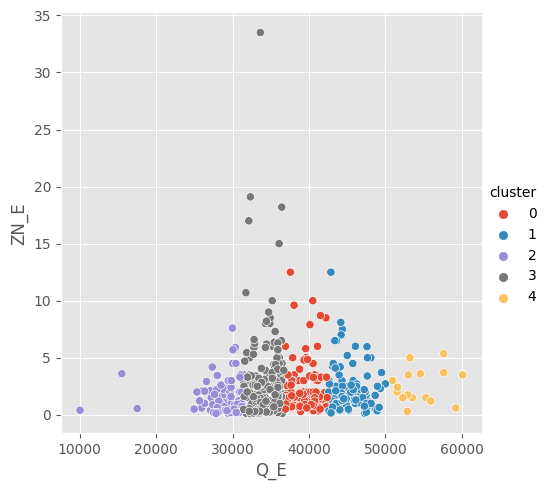

In [152]:
# visualize clusters using 2 features
sns.relplot(
    x="Q_E", y="ZN_E", hue="cluster", data=df_wtp_clusters
);
plt.show();

**Observations**

1. In the first and second clusters, there are cases where we have outliers.
2. Some clusters (at least in the above case) has quite less observations as compared to the others.

### 4. Tuning (Finding The Right K)

To find the right value of K, we will use the Elbow method, where we would compute the WCSS (Within cluster sum of squared) value for each value of K in the range of 1 to 20. This will help us find the optimal value of K post which the WCSS (error, by itself) does not change much.

In [153]:
# Elbow method to select K Value
wcss=[]
for k in range(1,21):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df_wtp_convert)
    wcss.append(kmeans.inertia_)

In [154]:
# Checking WCSS values manually
wcss

[22719730617.06823,
 8256909047.724056,
 5190189889.200893,
 3415951103.3199463,
 2484229665.8574834,
 1853885589.3340917,
 1360549118.6116953,
 1121235223.1265893,
 966514679.242326,
 849262025.5392084,
 749867616.6364484,
 672531869.4223522,
 624481919.8355709,
 588653599.7342644,
 547302223.9772851,
 521617451.364218,
 485785812.16839695,
 467528141.7945418,
 440657124.7819481,
 410931694.92633766]

One better way to find the right value of K is to plot WCSS v/s K and find the elbow point. 
This is the specific value of K beyond which the errors does not change much.

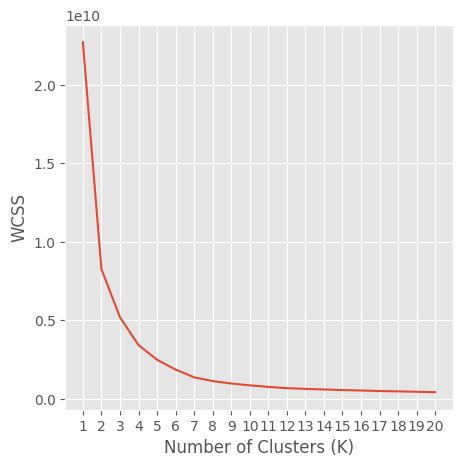

In [162]:
# plot elbow curve
plt.plot(range(1,21),wcss)
plt.xticks(range(1,21))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

**Observation**

1. Value of K can be ideally 6, 7 or 8, since post this value the error decline is very small.
2. Choosing a higher value of K poses operational challenges of how any further actions can be taken.
3. Choosing a lower value of K will result into possible incorrect groupings of the observations.

### 5. Better K-Means Clustering Model

In [156]:
# fitting new K-Means model
kmeans = KMeans(n_clusters=6)

In [157]:
# new copy of the data
df_wtp_clusters_impr = df_wtp_convert.copy()

In [158]:
# Fit the first KMeans clustering model
df_wtp_clusters_impr["cluster"] = kmeans.fit_predict(df_wtp_clusters_impr)

In [159]:
# creating the new column as category
df_wtp_clusters_impr["cluster"] = df_wtp_clusters_impr["cluster"].astype("category")

In [160]:
# Checking concentration of records in each cluster
df_wtp_clusters_impr['cluster'].value_counts()

cluster
2    220
4    108
0     90
1     88
3     17
5      3
Name: count, dtype: int64

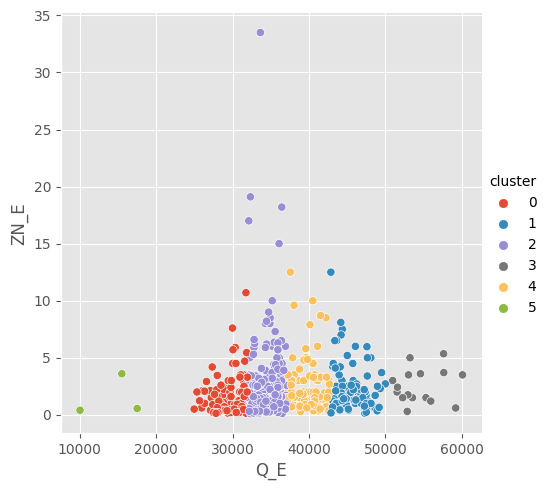

In [161]:
# visualize clusters using 2 features
sns.relplot(
    x="Q_E", y="ZN_E", hue="cluster", data=df_wtp_clusters_impr
);
plt.show();

# End